## Lựa chọn k cho thuật toán K-NEAREST NEIGHBOR (KNN)

Lựa chọn k là một bước then chốt trong việc thực hiện thuận toán KNN vì nó là tham số ảnh hưởng lớn đến mức độ chính xác của thuận toán khi, chẳng hạn, phân loại. Trong bài này người viết trình bày cách tiếp cận trong thực tế cho việc lựa chọn k tối ưu. 

Dữ liệu sử dụng là breast cancer data và các bạn có thể tìm hiểu [ở đây](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29). Đây là bộ dữ liệu điển hình được sử dụng trong nhiều nghiên cứu cũng như bài giảng về Machine Learning. 

Về các chọn k phù hợp cho thuật toán KNN các bạn có thể tham khảo thêm [ở đây](https://www.researchgate.net/post/How_can_we_find_the_optimum_K_in_K-Nearest_Neighbor) và [ở đây](http://dataaspirant.com/2016/12/23/k-nearest-neighbor-classifier-intro/). 

Cách tiếp cận  cho việc tìm k với bộ dữ liệu breast cancer được thực hiện như sau: chọn một loạt các khoảng k từ 1 đến 11 (số features, hay số chiều của dữ liệu) và ứng với mỗi giá trị của k chúng ta huấn luyện mô hình KNN trên 75% bộ số liệu nguyên gốc còn 20% số liệu còn lại để kiểm định mô hình có được. Giá trị k nào mà dẫn đến sai số huấn luyện thấp nhất (hay mức độ chính xác cao nhất) sẽ được lựa chọn làm k tối ưu cho thuật toán KNN. 

Và giá trị đó là k = 6. 


In [ ]:
# Load gói sklearn: 
import sklearn

# Load bộ dữ liệu breast: 
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
# Load hàm phân chia dữ liệu: 
from sklearn.model_selection import train_test_split

In [58]:
# Thực hiện phân chia dữ liệu theo tỉ lệ 75% và 25% tương ứng với training và testing data:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    test_size = 0.25, 
                                                    random_state = 66)

In [59]:
# Tạo các array trống: 
training_accuracy = [] 
test_accuracy = [] 
# Chọn một khoảng cho số lượng hàng xóm: 
k = range(1, 11)

In [60]:
# Load hàm cần dùng cho thuật toán KNN: 
from sklearn.neighbors import KNeighborsClassifier 
for n_neighbors in k:    
    # Chạy mô hình KNN:    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)    
    clf.fit(X_train, y_train)    
    # Lưu lại giá trị của training error: 
    training_accuracy.append(clf.score(X_train, y_train))    
    # Lưu lại giá trị của testing error:  
    test_accuracy.append(clf.score(X_test, y_test))


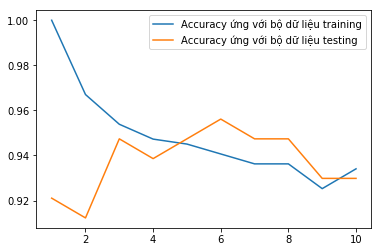

In [57]:
# Hình ảnh hóa training và testing error theo số lượng hàng xóm được chọn: 
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(neighbors_settings, training_accuracy, label = "Accuracy ứng với bộ dữ liệu training") 
plt.plot(neighbors_settings, test_accuracy, label = "Accuracy ứng với bộ dữ liệu testing") 
plt.legend()